# Word Generator 

.. codeauthor:: Emile Roux emile.roux@univ-smb.fr

.. This notebook is ready for  [RISE](https://damianavila.github.io/RISE/) Slideshow

## Scope

This notebook was inspired by the great video proposed by David Louapre available on his Youtube channel *"Science Etonnante"*.

https://sciencetonnante.wordpress.com/2015/11/06/la-machine-a-inventer-des-mots-version-ikea/

Here the word generator is embedded in a class.

In [1]:
# Setup 
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import IPython, io, urllib
import codecs
import re
from numpy.random import choice, seed
seed(1)


## The video 

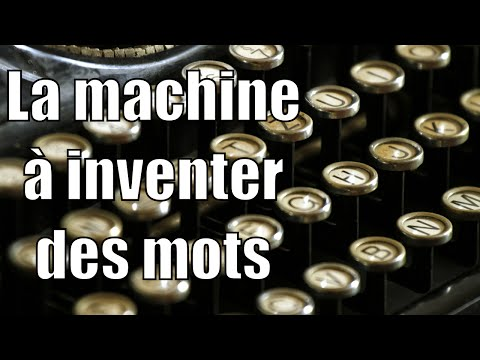

In [2]:
IPython.display.YouTubeVideo('YsR7r2378j0')

## The Class that manage the word generator

In [15]:
class word_generator:

    def __init__(self,dic_file):
        # Input file containing one word per line, and its encoding
        # Assumes one word per line but if the the words are followed by 
        # a space, a tab, a slash, a comma, etc....the end of the line will be trimmed
        self.dic_file = dic_file
        self.encoding = "ISO-8859-1"

        # Name of the output binary matrix, matrix image file and output txt file
        count_file = r"count_FR.bin"
        proba_matrix = r"matrix_FR.png"
        self.outfile = r"output.txt"
        
        self.read_dic()
    

    def read_dic(self):
        self.dico = []  # to store the words of the dictionnary

        self.count = np.zeros((256,256,256),dtype='int32')
        with codecs.open(self.dic_file, "r", self.encoding) as lines:
            for l in  lines:
                # Trimming of the line :
                # Split on white space, tab, slash backslah or open parenthesis 
                # and keep the first string, add EOL character
                l2 = re.split("[ /\\\t,\(]",l)[0] + "\n"
                self.dico.append(l2[:-1])        
                i, j = 0, 0
                for k in [ord(c) for c in list(l2)]:
                    self.count[i,j,k] += 1
                    i = j
                    j = k
                    
     
    def plot(self):
        count2D=self.count.sum(axis=0)
        p2D=count2D.astype('float')/np.tile(sum(count2D.T),(256,1)).T
        p2D[np.isnan(p2D)] = 0

        # For better contrast, we plot p^alpha instead of p
        alpha = 0.33
        p2Da = p2D**alpha
        self.p2Da = p2Da[97:123,97:123]

        # We display only letters a to z, ie ASCII from 97 to 123.
        plt.figure(figsize=(8,8))
        gr=plt.imshow(self.p2Da,interpolation='nearest', cmap = mpl.cm.OrRd)
        plt.axis('off')
        cbar = plt.colorbar(gr, orientation = "vertical")

        for i in range(97,123):
            plt.text(-1,i-97,chr(i),horizontalalignment='center',
                                    verticalalignment='center')
            plt.text(i-97,-1,chr(i),horizontalalignment='center',
                            verticalalignment='center')
            
    def __call__(self):
        # For the random generator : what is the minimum and maximum number of letters
        # in the words that we want to generate, and how many words for each length
        smin, smax = 4, 12
        K = 5
        
        # Compute the probabilities by normalizing the counts
        s=self.count.sum(axis=2)
        st=np.tile(s.T,(256,1,1)).T
        p=self.count.astype('float')/st
        p[np.isnan(p)]=0
        
        f = codecs.open(self.outfile,"w",self.encoding)
        # Generate words
        for size in range(smin, smax + 1):
            total = 0
            while total < K:
                i, j = 0, 0
                res = u''
                while not j==10:
                    k = choice(range(256),1,p=p[i,j,:])[0]
                    res = res + chr(k)
                    i, j = j, k
                if len(res) == 1 + size:
                    x=res[:-1]
                    if res[:-1] in self.dico:
                        x=res[:-1]+"*"
                    total += 1
                    print(x)
                    f.write(x+"\n")
        f.close()



## French 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


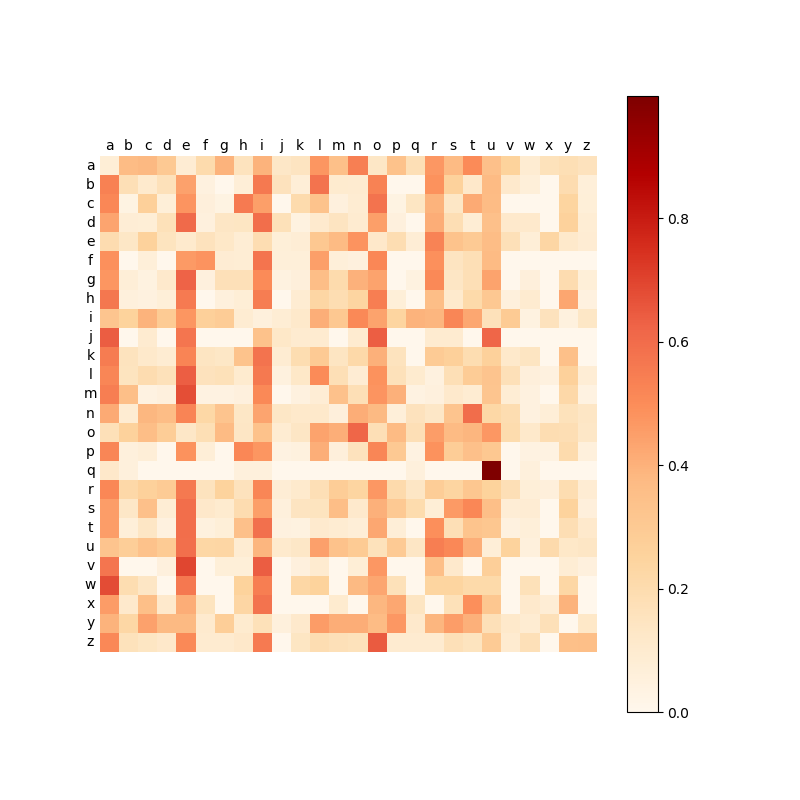

In [16]:
gen_FR=word_generator(r"_DATA/dic/FR.txt")
gen_FR.plot()

In [17]:
gen_FR()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


réne
line
aber*
agne
lage
mique
booir
maste
répht
Since
dépire
conste
ploïde
symbre
utipre
acfusse
travoix
éplaque
baoïque
mniquet
frisorer
désautol
gativrud
géniment
caondaté
callohage
mâchausse
compenter
roptatite
sacassele
corisseure
antionjune
hydementer
igoniqueme
imonisteme
pliquilotte
hakomiresse
laneximique
es-boularté
taniâtionne
paphillerder
phomelcoulux
ineffectuage
hympoismoine
métronatiser


## Swedish  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


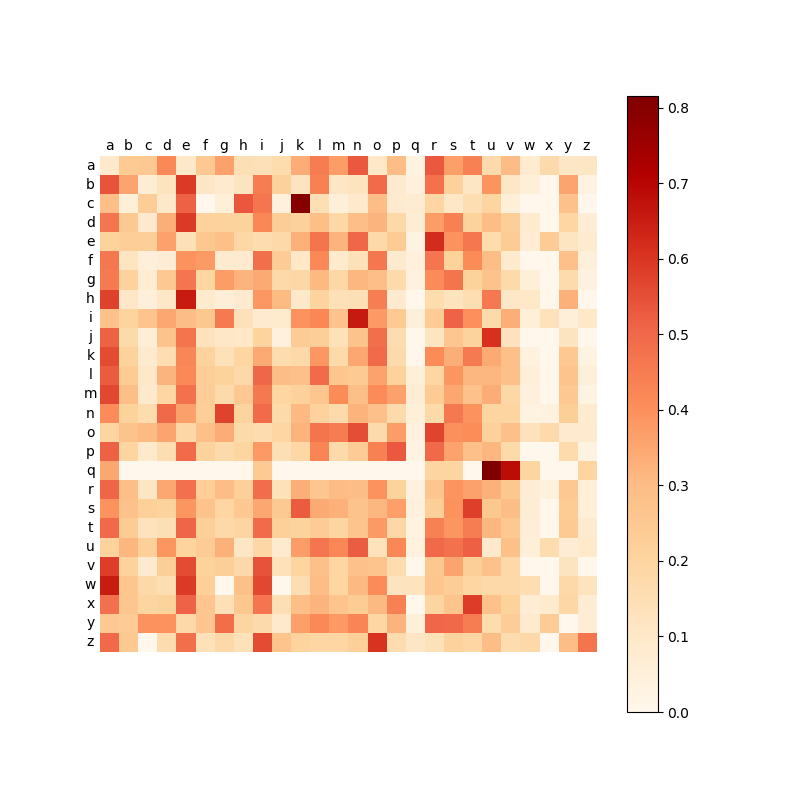

In [18]:
gen_SE=word_generator(r"_DATA/dic/SE.txt")
gen_SE.plot()

In [21]:
gen_SE()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


lång*
påge
shis
cent*
ruri
arvsk
foran
macka*
Chorm
titer
kninad
lannat
skrynt
flysen
backes*
Treving
dömsuga
simunda
gällbor
Muskydd
fulandra
fandkväg
flighede
pjästaom
Hölvsvår
fortrunde
hagsthant
högkördig
rinnasing
speeplitt
sadamkomst
ilrasbrong
grungering
renspyssne
tenhalfade
sventerfask
Sonslufsisk
operafinssa
gyncheterum
flafisighet
Trällodering
unjetslugmon
åkningsrerap
skicknäskägo
bumärväravka


## Compare french and swedisch

<IPython.core.display.Javascript object>


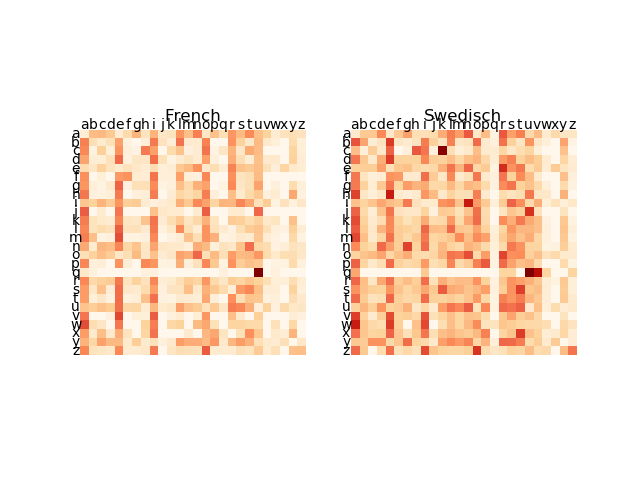

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(gen_FR.p2Da,interpolation='nearest', cmap = mpl.cm.OrRd)
ax.axis('off')
for i in range(97,123):
            plt.text(-1,i-97,chr(i),horizontalalignment='center',
                                    verticalalignment='center')
            plt.text(i-97,-1,chr(i),horizontalalignment='center',
                            verticalalignment='center')
plt.title('French')

ax = fig.add_subplot(1,2,2)
ax.imshow(gen_SE.p2Da,interpolation='nearest', cmap = mpl.cm.OrRd)
ax.axis('off')
for i in range(97,123):
            plt.text(-1,i-97,chr(i),horizontalalignment='center',
                                    verticalalignment='center')
            plt.text(i-97,-1,chr(i),horizontalalignment='center',
                            verticalalignment='center')
plt.title('Swedisch')
plt.show()